<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Ogembo-View" data-toc-modified-id="Ogembo-View-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ogembo View</a></span><ul class="toc-item"><li><span><a href="#Ogemba-Last-90-Days-as-at-26-Mar-2018-<span id='python_58B0B50714BC4B19832A8ED6FE7F7704_184'></span>." data-toc-modified-id="Ogemba-Last-90-Days-as-at-26-Mar-2018-<span id='python_58B0B50714BC4B19832A8ED6FE7F7704_46'></span>.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ogemba Last 90 Days as at 26-Mar-2018 <span id="python_58B0B50714BC4B19832A8ED6FE7F7704_101"></span>.</a></span><ul class="toc-item"><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Summary Stats</a></span></li><li><span><a href="#Referral-Capacity-as-Per-Last-90-Days-Data" data-toc-modified-id="Referral-Capacity-as-Per-Last-90-Days-Data-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Referral Capacity as Per Last 90 Days Data</a></span></li></ul></li><li><span><a href="#Ogembo-2015---2017" data-toc-modified-id="Ogembo-2015---2017-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ogembo 2015 - 2017</a></span><ul class="toc-item"><li><span><a href="#Referral-Capacity-KE-in-2017" data-toc-modified-id="Referral-Capacity-KE-in-2017-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Referral Capacity KE in 2017</a></span></li><li><span><a href="#The-Summary-Tables" data-toc-modified-id="The-Summary-Tables-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>The Summary Tables</a></span></li></ul></li></ul></li><li><span><a href="#All-KE-2015---2017" data-toc-modified-id="All-KE-2015---2017-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>All KE 2015 - 2017</a></span><ul class="toc-item"><li><span><a href="#Summaries-KE-2015---2017" data-toc-modified-id="Summaries-KE-2015---2017-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summaries KE 2015 - 2017</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Ogembo-Additions" data-toc-modified-id="Ogembo-Additions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ogembo Additions</a></span><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#By-HH-Quintiles" data-toc-modified-id="By-HH-Quintiles-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>By HH Quintiles</a></span></li></ul></li><li><span><a href="#All-KE-Additions" data-toc-modified-id="All-KE-Additions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>All KE Additions</a></span></li></ul></li></ul></div>

In [1]:
%run "../../zUtilz/load_envz.ipynb"

In [36]:
%run "../../zUtilz/LG_load_envz.ipynb"

ERROR:root:Cell magic `%%R` not found.


In [3]:
## Load Dataset - Ogembo Last 90 Days Dashboard
og_dt = pd.read_csv( "%s/LG/Ogembo_targeted_chv_support_ke-20180326.csv" % DATA_DIR)
og_dt.drop("Phone Number", axis=1, inplace=True)

LAST_DATED = "26-Mar-2018" 

In [4]:
## Load Dataset - KE 2015 - 2017
ke_dt = pd.read_csv( "%s/LG/Branch Data 2015-2017.csv" % DATA_DIR)


# Introduction

**What are we looking into?**
- An indication of potential sample size 
    - Reach:- Number of Study Units: CHWs, HHs, CUs reached
    - Transactions:- Number Transction Records: for a particular output 
        - E.G. for referrals, ratio of treatments to assessments and referrals
        - Sums or totals
        - Average per CHW

# Ogembo View

## Ogemba Last 90 Days as at 26-Mar-2018 {{LAST_DATED}}. 

In [35]:
## Calaculated fields
og_dt["Country"] = "KE"
og_dt["Hits_Sales_Target"]= np.where( og_dt["Sales"] < SALES_TARGET, 0, 1)
#quintilize(og_dt, "Households Registered")

og_dt["Total Assessments"] = og_dt["Total U1 Assessments"] + og_dt["Total U5 Assessments"] 
og_dt["Total Treatments"] = og_dt["Total U1 Treatments"] + og_dt["Total U5 Treatments"] 
og_dt["Total Referrals"] = og_dt["On Time Referral f/u Treatment U5"] 


### Compute some %s 
def pctAssessment( x ):
    og_dt[ "Pct_"+x+"_in_Assessed"] = np.nan_to_num( og_dt[x] / og_dt["Total Assessments"]) 
def pctTreatment( x ): 
    og_dt[ "Pct_"+x+"_in_Treated"] = np.nan_to_num( og_dt[x] / og_dt["Total Treatments"]) 
    
argz_pct_in_assessed = ["Community Events", "Pregnancy", "Total Referrals", 
                        "Total Treatments", "All Malaria Treatments", 
                        "All Malaria Assessments", "Total U1 Assessments", "Total U5 Assessments",
                        "U5 Malaria", "U5 Pneumonia", "U5 Diarrhea", 
                       ] 
dnul = pd.Series( argz_pct_in_assessed ).apply(lambda x: pctAssessment(x) )

argz_pct_in_treated = ["Total Referrals",
                       "Total U1 Treatments", "Total U5 Treatments", "All Malaria Treatments", 
                        "U5 Malaria", "U5 Pneumonia", "U5 Diarrhea", 
                       ]
dnul = pd.Series( argz_pct_in_treated ).apply(  lambda x: pctTreatment(x) )




### Variables
argz_n = ["CHP ID"]

argz_EPM = ["Sales", "Community Events", "Pregnancy", "Total Referrals","Total Treatments", "Total Assessments","All Malaria Assessments"]

argz_malaria = ["All Malaria Assessments", "All Malaria Treatments", "U5 Malaria", "Act 6pack Issue", "mRDT Used"]
argz_cases = ["U5 Malaria", "U5 Pneumonia", "U5 Diarrhea"]
argz_axns = ["Total Assessments", "Total Treatments", "Total Referrals", "All Malaria Assessments", "All Malaria Treatments"]
argz_referral = ["Total Referrals"]
argz_pregoz = ["Pregnancy"]
argz_u1_u5 = ["Total U1 Assessments", "Total U1 Treatments","Total U5 Assessments", "Total U5 Treatments"]


argz_pct = np.array( pd.Series( ["Total Treatments", "Total Referrals", "All Malaria Treatments","Total U1 Assessments","Total U5 Assessments"]).apply(lambda x: "Pct_"+x+"_in_Assessed" ) )
#og_dt[argz_pct[0]].head()
#og_dt.info()

#og_dt[["Total Assessments","Total U1 Assessments","Total U5 Assessments", "Total Referrals", "On Time Referral f/u Treatment U5"]].head(4)
og_dt.describe()


,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,...,Pct_U5 Malaria_in_Assessed,Pct_U5 Pneumonia_in_Assessed,Pct_U5 Diarrhea_in_Assessed,Pct_Total Referrals_in_Treated,Pct_Total U1 Treatments_in_Treated,Pct_Total U5 Treatments_in_Treated,Pct_All Malaria Treatments_in_Treated,Pct_U5 Malaria_in_Treated,Pct_U5 Pneumonia_in_Treated,Pct_U5 Diarrhea_in_Treated
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,3.375000,0.578632,0.736111,12.375000,3.166667,52.097222,17.333333,5.805556,6.000000,5.527778,...,0.078053,0.091042,0.098757,0.070808,0.134468,0.796087,0.257382,0.202134,0.265750,0.328203
std,2.514395,0.393431,1.150542,8.081343,3.556387,28.418482,16.809622,10.073866,6.342346,6.577752,...,0.114505,0.110721,0.097165,0.140290,0.110898,0.242675,0.277316,0.234466,0.236281,0.251388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.312500,0.000000,6.750000,0.000000,35.500000,5.000000,0.000000,1.000000,1.000000,...,0.000000,0.015326,0.020859,0.000000,0.000000,0.761084,0.015957,0.000000,0.074359,0.128409
50%,3.000000,0.666667,0.000000,11.000000,2.000000,49.000000,13.000000,1.500000,5.000000,3.000000,...,0.027027,0.061915,0.067879,0.034785,0.127717,0.857143,0.166667,0.125000,0.222527,0.316964
75%,5.000000,1.000000,1.000000,17.000000,4.250000,64.250000,21.250000,8.000000,9.000000,8.000000,...,0.104126,0.123696,0.141346,0.071429,0.200000,0.916667,0.372727,0.333333,0.406333,0.461538
max,10.000000,1.000000,7.000000,33.000000,15.000000,137.000000,77.000000,51.000000,30.000000,32.000000,...,0.510000,0.500000,0.474576,1.000000,0.500000,1.000000,1.083333,1.000000,1.000000,1.000000


### Summary Stats
** Sample Size Indication **
- Reach: CHWs, Households
- Transactions: Referrals, 



 Summarizing Key Variables 


,Sales,Community Events,Pregnancy,Total Referrals,Total Treatments,Total Assessments,All Malaria Assessments
# CHW,72.00,72.00,72.00,72.00,72.0,72.00,72.00
# Cases or Sum,525323.29,448.00,243.00,48.30,1476.0,4642.00,928.00
Avg. per CHW,7296.16,6.22,3.38,0.67,20.5,64.47,12.89
Max per CHW,59812.62,29.00,10.00,1.00,88.0,170.00,76.00
Min per CHW,-1040.00,0.00,0.00,0.00,0.0,0.00,0.00




 Summarizing Activities 


,Pregnancy,U5 Malaria,U5 Pneumonia,U5 Diarrhea,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,Total Referrals
# CHW,72.00,72.00,72.00,72.0,72.00,72.00,72.0,72.00,72.00
# Cases or Sum,243.00,418.00,398.00,432.0,891.00,228.00,3751.0,1248.00,48.30
Avg. per CHW,3.38,5.81,5.53,6.0,12.38,3.17,52.1,17.33,0.67
Max per CHW,10.00,51.00,32.00,30.0,33.00,15.00,137.0,77.00,1.00
Min per CHW,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00




 Graph of Key Assessment Activites as % of Total Assessments- Last 90 Days to 26-Mar


,Pct_Total Treatments_in_Assessed,Pct_Total Referrals_in_Assessed,Pct_All Malaria Treatments_in_Assessed,Pct_Total U1 Assessments_in_Assessed,Pct_Total U5 Assessments_in_Assessed
# CHW,72.00,72.00,72.00,72.00,72.00
# Cases or Sum,22.43,0.85,6.91,12.68,56.32
Avg. per CHW,0.31,0.01,0.10,0.18,0.78
Max per CHW,1.17,0.08,0.69,0.33,0.97
Min per CHW,0.00,0.00,0.00,0.00,0.00


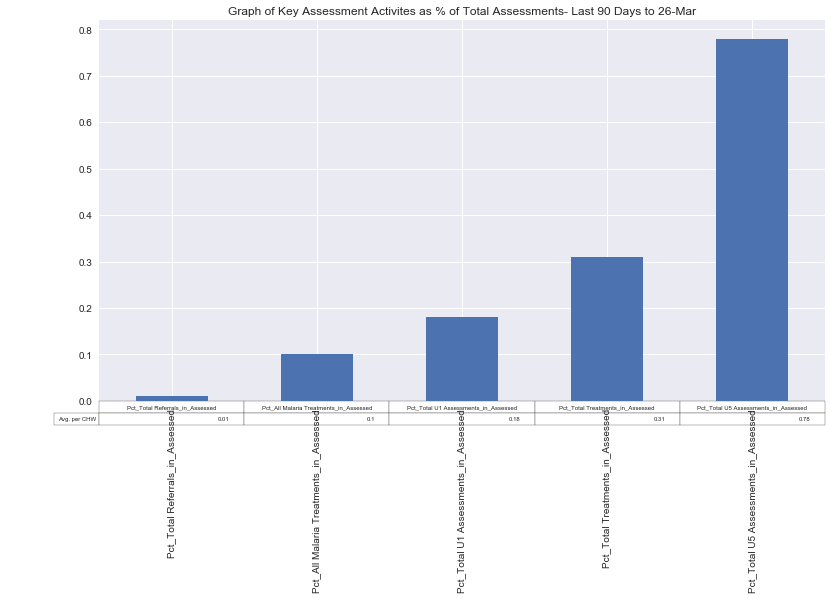

In [37]:
## Summarize 
CHWSummaries( og_dt, argz_EPM , "Summarizing Key Variables ", plotit=False)
CHWSummaries( og_dt, argz_pregoz+argz_cases+argz_u1_u5+argz_referral, "Summarizing Activities ", plotit=False) 
d,g = CHWSummaries( og_dt, argz_pct, "Graph of Key Assessment Activites as % of Total Assessments- Last 90 Days to 26-Mar", 
                   plotit=True, tbl=True, prefCol="Avg")
d
#pd.pivot_table( og_dt, index="Country", values=["Total Assessments","Total U1 Assessments","Total U5 Assessments", "Total Referrals"], aggfunc=np.sum, margins=True)

### Referral Capacity as Per Last 90 Days Data

- For this year, 2018, Ogembo has had {{np.round( og_dt["Total Referrals"].sum() )}} referrals in the last 90 days as at {{LAST_DATED}}

    - Number of referrals made as a percent of total child assessments made is {{np.around(og_dt[ ("Pct_"+"Total Referrals"+"_in_Assessed") ].mean()*100 )}} % 
    
        - What's happening to the other assessments? 
            - How many are just "false +ves"?
            - How many are not recorded?
            - How many and because of reasons/cases we don't have a protocol for? 
    



## Ogembo 2015 - 2017

**TODO**
- what's family visited, family registered, population served
- get counts of CHWs per branch or granular level  by CHW and not branch



In [7]:

ke_dt["Country"] = "KE"
ke_dt["Year"] = pd.to_datetime(ke_dt["interval_start"], dayfirst=True, errors='coerce').dt.year
ke_dt["Month"] = pd.to_datetime(ke_dt["interval_start"], dayfirst=False, errors='coerce') .dt.month 


# assign county
#TODO: reduce
ke_dt["CountyRegion"] = np.where( ke_dt["branch_name"].isin( list(REGIONS.values())[0]), list(REGIONS.keys())[0], 
                                np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[1]), list(REGIONS.keys())[1], 
                                        np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[2]), list(REGIONS.keys())[2], 
                                                 np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[3]), list(REGIONS.keys())[3], 
                                                         np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[4]), list(REGIONS.keys())[4], 
                                                                 np.where( ke_dt["branch_name"].isin(list(REGIONS.values())[5]), list(REGIONS.keys())[5], "UNDEF" )
                                                                 )))))


## Calculated Fields
ke_dt["total_assess_child"] = ke_dt["assess_u1"]+ke_dt["assess_u5"]
ke_dt["total_assessments"]= ke_dt["assess_any"]+ke_dt["total_assess_child"]
ke_dt["total_treat_child"] = ke_dt["treatments_u1"]+ke_dt["treatments_u5"]

ke_dt["total_malaria_child"] = ke_dt["malaria_u1"]+ke_dt["malaria_u5"]
ke_dt["total_pneumonia_child"] = ke_dt["pneumonia_u1"]+ke_dt["pneumonia_u5"]
ke_dt["total_diarrhea_child"] = ke_dt["diarrhea_u1"]+ke_dt["diarrhea_u5"]

ke_dt["malaria_all_ages_pos_mrdt_treated"] = ke_dt["malaria_u5_mrtd_pos_treated"]+ke_dt["malaria_o5_mrtd_pos_treated"]

#demogz = ke_dt.melt()

In [8]:
# Totals for the year are in month 12
EOY_ke_dt = ke_dt[ ke_dt["Month"] == 12 ]

#EOY_ke_dt.info()

## Country averages on assessments, treatments and referrals
og_2017 = EOY_ke_dt[ (EOY_ke_dt["Year"]==2017) & (EOY_ke_dt["branch_name"]=="Ogembo")]

In [9]:
## Variables
ke_argz_n = ["branch_name", ""]
ke_argz_EPM = ["families_registered", "population_served", "u5_population_served", "community_events", "pregnancies_registered", "total_assess_child", "total_deliveries_at_hf", "malaria_all_ages", "families_visited" ] #"active_chws_in_period", 

ke_argz_referral = ["baby_danger_signs_refer"]
ke_argz_fus=["required_follow_ups", "on_time_follow_ups", "missed_visits"]
ke_argz_pregfus=["all_first_fu_pnc_visits", "on_time_pnc_visits_48h"]

ke_argz_diseases=["total_malaria_child", "total_pneumonia_child","total_diarrhea_child"]
ke_argz_malaria=["malaria_all_ages_pos_mrdt_treated", "mrdt_positive", "mrdt_negative", "mrdt_none", "malaria_all_ages","total_malaria_child", "malaria_u5_mrtd_pos_treated"]

ke_argz_signs = ["fever_cases", "fast_breathing_u5", "cough_two_weeks"]

ke_argz_pregoz = ["pregnancies_registered", "underage_pregnancies","total_deliveries_at_hf" ,"anc_visits", "on_time_pnc_visits",  "total_healthy_pnc_visits", "all_first_fu_pnc_visits", "on_time_pnc_visits_48h", "mothers_counselled_on_exclusive_breastfeeding"]

### Referral Capacity KE in 2017

** Assessments that don't end up in treatment or follow-up**
- Of the {{og_2017["total_assess_child"].iloc[0]}} total child assessments in 2017, about {{(og_2017["total_assess_child"].iloc[0] - og_2017["total_treat_child"].iloc[0])}} are not treated and about {{(og_2017["total_assess_child"].iloc[0] - (og_2017["total_treat_child"].iloc[0]+og_2017["required_follow_ups"].iloc[0])  )}} did not get treated or require referral.

    - What happens to those {{(og_2017["total_assess_child"].iloc[0] - (og_2017["total_treat_child"].iloc[0]+og_2017["required_follow_ups"].iloc[0]) )}} cases? 
        - Are they often a non-issue or a case that we don't have protocol for?
        - How many of those should be referred and how actually do get referred?
        
        **TODO:** find out more about the variables. We may not be correctly running the procedure for last 3 years and so some fields end up with zeros when they shouldn't

### The Summary Tables

In [10]:
print("\n\n\n1.Ogembo Totals By Year")
pd.pivot_table( EOY_ke_dt[ EOY_ke_dt["branch_name"]=="Ogembo"], 
               index=["branch_name", "Year"],
               values=ke_argz_EPM, aggfunc=np.sum, margins=True) 




1.Ogembo Totals By Year


community_events  families_registered  families_visited  \
branch_name Year                                                            
Ogembo      2015               0.0                  0.0               0.0   
            2016               0.0                  0.0               0.0   
            2017             193.0                 48.0               0.0   
All                          193.0                 48.0               0.0   

                  malaria_all_ages  population_served  pregnancies_registered  \
branch_name Year                                                                
Ogembo      2015               0.0                0.0                     0.0   
            2016               0.0                0.0                     0.0   
            2017             272.0              261.0                    71.0   
All                          272.0              261.0                    71.0   

                  total_assess_child  total_deliveries_at_hf  \
branch_name Year                                               
Ogembo      2015                 0.0                     0.0   
            2016                 0.0                     0.0   
            2017              1488.0                     0.0   
All                           1488.0                     0.0   

                  u5_population_served  
branch_name Year                        
Ogembo      2015                   0.0  
            2016                   0.0  
            2017                 130.0  
All                              130.0

In [11]:
print( "\n\n1. Country Averages per Branch ")
pd.pivot_table( EOY_ke_dt, index=[ "Year"], values=ke_argz_EPM+ke_argz_diseases+ke_argz_fus,aggfunc=np.mean, margins=False).round(1)
print( "\n\n2. Ogembo Averages")
pd.pivot_table( EOY_ke_dt[ EOY_ke_dt["branch_name"]=="Ogembo"], index=[ "Year"], values=ke_argz_EPM+ke_argz_diseases+ke_argz_fus,aggfunc=np.mean, margins=False).round(1)




1. Country Averages per Branch 


,community_events,families_registered,families_visited,malaria_all_ages,missed_visits,on_time_follow_ups,population_served,pregnancies_registered,required_follow_ups,total_assess_child,total_deliveries_at_hf,total_diarrhea_child,total_malaria_child,total_pneumonia_child,u5_population_served
Year,,,,,,,,,,,,,,,
2015,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,8.9,916.2,0.0,239.8,18.4,63.4,3365.4,76.6,81.7,605.6,0.0,88.6,170.6,75.1,489.4
2017,154.3,143.4,0.0,754.2,37.8,193.9,600.3,95.8,231.6,1744.3,0.0,205.5,584.7,176.4,217.7




2. Ogembo Averages


,community_events,families_registered,families_visited,malaria_all_ages,missed_visits,on_time_follow_ups,population_served,pregnancies_registered,required_follow_ups,total_assess_child,total_deliveries_at_hf,total_diarrhea_child,total_malaria_child,total_pneumonia_child,u5_population_served
Year,,,,,,,,,,,,,,,
2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017,193,48,0,272,10,205,261,71,215,1488,0,177,236,184,130




 Ogembo end of 2017 


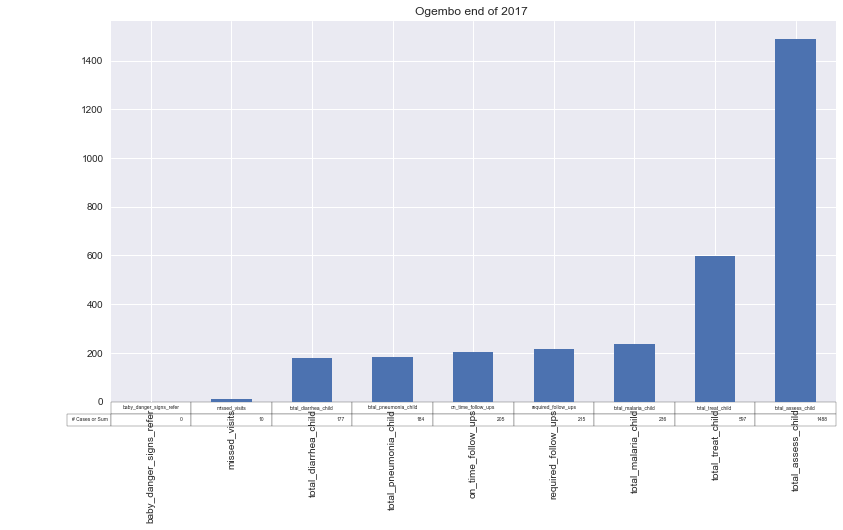

In [12]:
d,g = CHWSummaries( EOY_ke_dt[ (EOY_ke_dt["Year"]==2017) & (EOY_ke_dt["branch_name"]=="Ogembo")], ke_argz_diseases+ke_argz_referral+ke_argz_fus+["total_assess_child", "total_treat_child"], "Ogembo end of 2017 ", plotit=True, unit="Branch", tbl=True) 
g

# All KE 2015 - 2017

- unit of study is branch TODO: get at CHW level granularity

## Summaries KE 2015 - 2017 



 2. Diseases and Followups for 2017


 i.Summarizing Diseases @ KE 2017 


,total_malaria_child,total_pneumonia_child,total_diarrhea_child,baby_danger_signs_refer,required_follow_ups,on_time_follow_ups,missed_visits
# Cases or Sum,8186.00,2470.00,2877.0,0.0,3243.00,2714.00,529.00
Avg. per Branch,584.71,176.43,205.5,0.0,231.64,193.86,37.79
Max per Branch,1655.00,324.00,511.0,0.0,374.00,316.00,92.00
Min per Branch,5.00,5.00,2.0,0.0,9.00,1.00,5.00


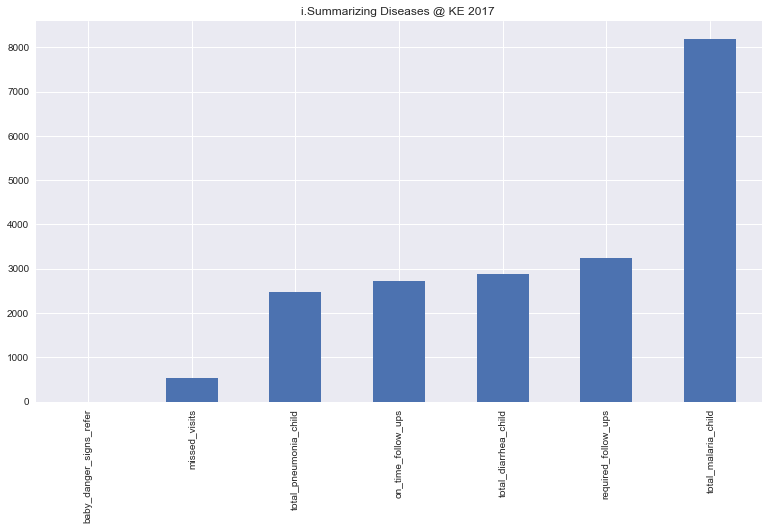

In [13]:
print("\n\n 2. Diseases and Followups for 2017")
d,g = CHWSummaries( EOY_ke_dt[ EOY_ke_dt["Year"]==2017], ke_argz_diseases+ke_argz_referral+ke_argz_fus, "i.Summarizing Diseases @ KE 2017 ", plotit=True, unit="Branch") 
d
g


# Appendix

## Ogembo Additions



 Getting a feel of distribution based on Households Registered


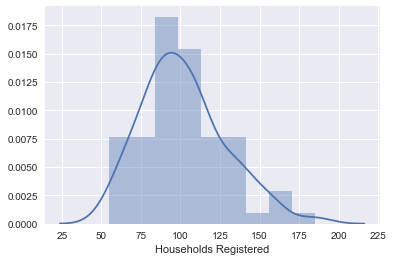

In [14]:
print("\n\n Getting a feel of distribution based on Households Registered")
og_dt.drop( og_dt[ (og_dt["Households Registered"] < 20) | (og_dt["Households Registered"] >250) ].index, inplace=True)
sns.distplot( og_dt["Households Registered"] )


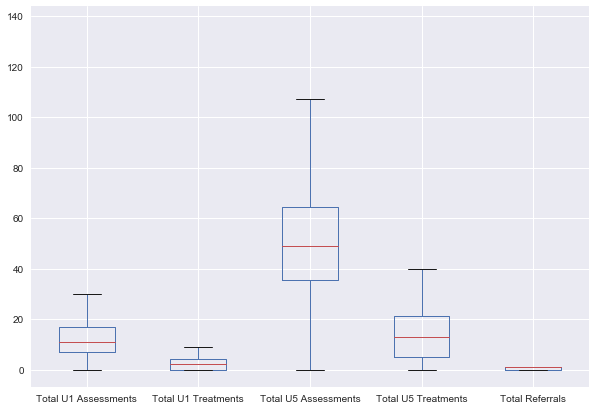

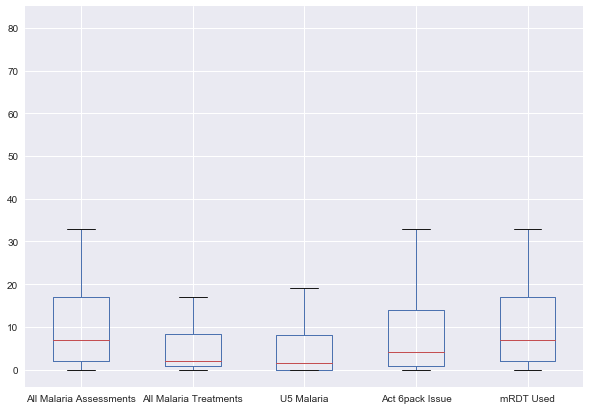

In [15]:
plotBoxz( og_dt, argz_u1_u5+argz_referral)
plotBoxz( og_dt, argz_malaria)

### Correlations
- Key indicators
- Within Malaria
- Amongst cases/diseases
- Relative to Sales target of KES {{SALES_TARGET}}



1. Correlations - Within KPIs


,Sales,Community Events,Pregnancy,Total Referrals,Total Treatments,Total Assessments,All Malaria Assessments
Sales,1.000,0.792,0.314,0.282,0.113,0.229,-0.025
Community Events,0.792,1.000,0.245,0.258,0.149,0.385,-0.001
Pregnancy,0.314,0.245,1.000,0.403,0.381,0.364,0.275
Total Referrals,0.282,0.258,0.403,1.000,0.326,0.374,0.149
Total Treatments,0.113,0.149,0.381,0.326,1.000,0.511,0.729
Total Assessments,0.229,0.385,0.364,0.374,0.511,1.000,0.363
All Malaria Assessments,-0.025,-0.001,0.275,0.149,0.729,0.363,1.000


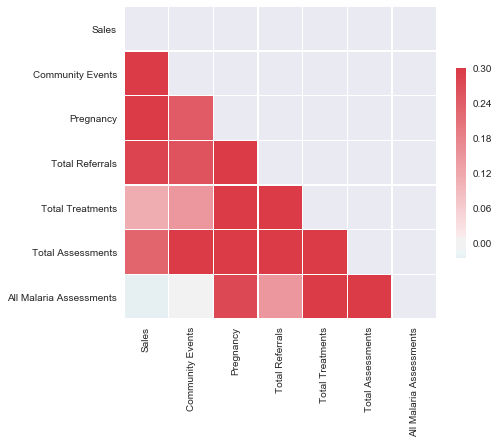

In [16]:
print("\n\n1. Correlations - Within KPIs")
t,g = plotCorrz( corrz( og_dt, argz_EPM) )
t




2. Correlations - Amongst Diseases/Cases


,U5 Malaria,U5 Pneumonia,U5 Diarrhea,Total Referrals,Pregnancy
U5 Malaria,1.000,0.258,0.260,0.178,0.214
U5 Pneumonia,0.258,1.000,0.361,0.290,0.233
U5 Diarrhea,0.260,0.361,1.000,0.238,0.362
Total Referrals,0.178,0.290,0.238,1.000,0.403
Pregnancy,0.214,0.233,0.362,0.403,1.000


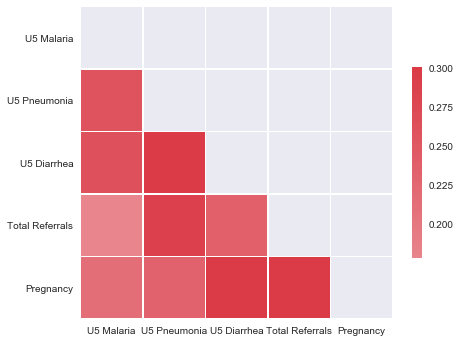

In [17]:
print("\n\n2. Correlations - Amongst Diseases/Cases")
t,g = plotCorrz( corrz( og_dt, argz_cases+argz_referral+argz_pregoz) )
t




3.a. Correlations - Relative to Sales Targets - 1).Misses Target


,Sales,Community Events,Pregnancy,Total Referrals,Total Treatments,Total Assessments,All Malaria Assessments
Sales,1.000,0.396,0.293,0.677,0.421,0.266,0.130
Community Events,0.396,1.000,0.488,0.460,0.144,0.385,0.209
Pregnancy,0.293,0.488,1.000,0.508,0.486,0.663,0.273
Total Referrals,0.677,0.460,0.508,1.000,0.236,0.347,0.019
Total Treatments,0.421,0.144,0.486,0.236,1.000,0.585,0.586
Total Assessments,0.266,0.385,0.663,0.347,0.585,1.000,0.558
All Malaria Assessments,0.130,0.209,0.273,0.019,0.586,0.558,1.000


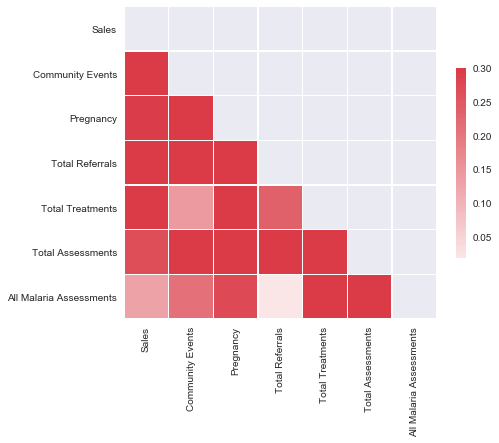

In [18]:
print("\n\n3.a. Correlations - Relative to Sales Targets - 1).Misses Target")
t,g = plotCorrz( corrz( og_dt[og_dt["Hits_Sales_Target"]==0], argz_EPM) )
t




3.b. Correlations - Relative to Sales Targets - 2).Hits Target


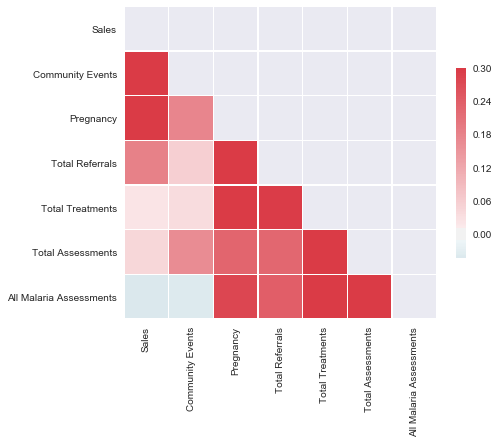

In [19]:
print("\n\n3.b. Correlations - Relative to Sales Targets - 2).Hits Target")
t,g = plotCorrz( corrz( og_dt[og_dt["Hits_Sales_Target"]==1], argz_EPM) )


### By HH Quintiles

## All KE Additions

In [20]:
print("\n\n1. All Branches At End of Each Year")
pd.pivot_table( EOY_ke_dt, index=["CountyRegion", "branch_name", "Year"], values=ke_argz_EPM+ke_argz_referral+ke_argz_fus,aggfunc=np.sum, margins=True)






1. All Branches At End of Each Year


baby_danger_signs_refer  community_events  \
CountyRegion    branch_name   Year                                              
BUSIA_COUNTY    Busia         2015                      0.0               0.0   
                              2016                      0.0              42.0   
                              2017                      0.0              44.0   
                Butula        2015                      0.0               0.0   
                              2016                      0.0               9.0   
                              2017                      0.0             132.0   
                Funyula       2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             145.0   
                Malaba        2015                      0.0               0.0   
                              2016                      0.0              38.0   
                              2017                      0.0              65.0   
                Nambale       2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             357.0   
                Port Victoria 2015                      0.0               0.0   
                              2016                      0.0              23.0   
                              2017                      0.0             388.0   
KAKAMEGA_COUNTY Malava        2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             189.0   
                Shinyalu      2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             171.0   
KHQ             HQ            2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0               0.0   
KIAMBU_COUNTY   Thika         2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0              31.0   
KISII_COUNTY    Kenyenya      2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             265.0   
                Ogembo        2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             193.0   
                Suneka        2015                      0.0               0.0   
                              2016                      0.0              12.0   
                              2017                      0.0              71.0   
NAKURU_COUNTY   Kuresoi       2015                      0.0               0.0   
                              2016                      0.0               0.0   
                              2017                      0.0             109.0   
All                                                     0.0            2284.0   

                                    families_registered  families_visited  \
CountyRegion    branch_name   Year                                          
BUSIA_COUNTY    Busia         2015                  2.0               0.0   
                              2016               2072.0               0.0   
                              2017                139.0               0.0   
     



2. Correlations - Amongst Key Variables


,families_registered,population_served,u5_population_served,community_events,pregnancies_registered,total_assess_child,total_deliveries_at_hf,malaria_all_ages,families_visited
families_registered,1.000,0.993,0.978,-0.094,0.716,0.193,NaN,0.098,NaN
population_served,0.993,1.000,0.978,-0.074,0.725,0.213,NaN,0.117,NaN
u5_population_served,0.978,0.978,1.000,0.046,0.829,0.373,NaN,0.249,NaN
community_events,-0.094,-0.074,0.046,1.000,0.391,0.725,NaN,0.427,NaN
pregnancies_registered,0.716,0.725,0.829,0.391,1.000,0.787,NaN,0.612,NaN
total_assess_child,0.193,0.213,0.373,0.725,0.787,1.000,NaN,0.798,NaN
total_deliveries_at_hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
malaria_all_ages,0.098,0.117,0.249,0.427,0.612,0.798,NaN,1.000,NaN
families_visited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


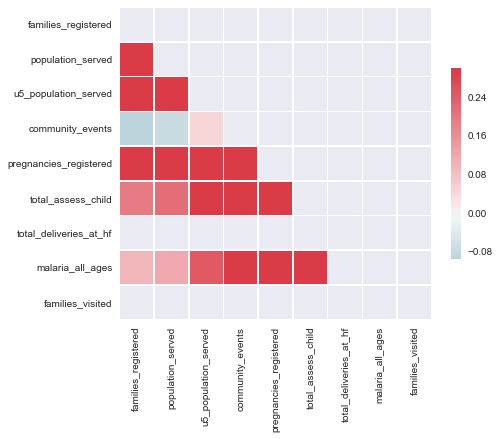

In [21]:
print("\n\n2. Correlations - Amongst Key Variables")
t,g = plotCorrz( corrz( EOY_ke_dt, ke_argz_EPM,) )
t




 3. Pregnancy


 i.Summarizing Pregnancy Activity @ KE 2017


,pregnancies_registered,underage_pregnancies,total_deliveries_at_hf,anc_visits,on_time_pnc_visits,total_healthy_pnc_visits,all_first_fu_pnc_visits,on_time_pnc_visits_48h,mothers_counselled_on_exclusive_breastfeeding
# Cases or Sum,1341.00,107.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Avg. per Branch,95.79,7.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max per Branch,147.00,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Min per Branch,10.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


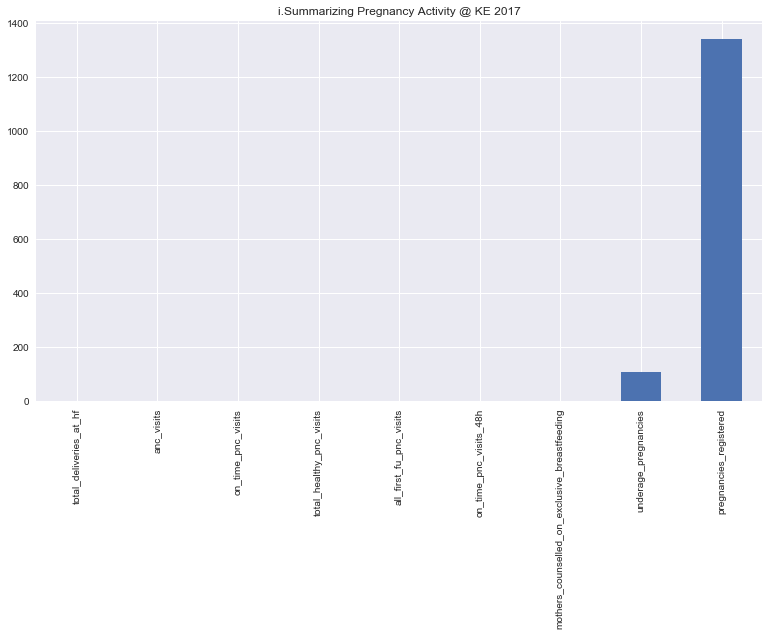

In [22]:
print("\n\n 3. Pregnancy")
d,g = CHWSummaries( EOY_ke_dt[ EOY_ke_dt["Year"]==2017], ke_argz_pregoz, "i.Summarizing Pregnancy Activity @ KE 2017", plotit=True, unit="Branch") 
d
g




ii.. Correlations - Amongst Cases or Diseases


,pregnancies_registered,underage_pregnancies,total_deliveries_at_hf,anc_visits,on_time_pnc_visits,total_healthy_pnc_visits,all_first_fu_pnc_visits,on_time_pnc_visits_48h,mothers_counselled_on_exclusive_breastfeeding,total_malaria_child,total_pneumonia_child,total_diarrhea_child,fever_cases,fast_breathing_u5,cough_two_weeks
pregnancies_registered,1.000,0.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.651,0.717,0.811,0.704,0.718,0.750
underage_pregnancies,0.956,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591,0.713,0.794,0.627,0.707,0.706
total_deliveries_at_hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_time_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_healthy_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_first_fu_pnc_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_time_pnc_visits_48h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mothers_counselled_on_exclusive_breastfeeding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_malaria_child,0.651,0.591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.621,0.768,0.970,0.618,0.438


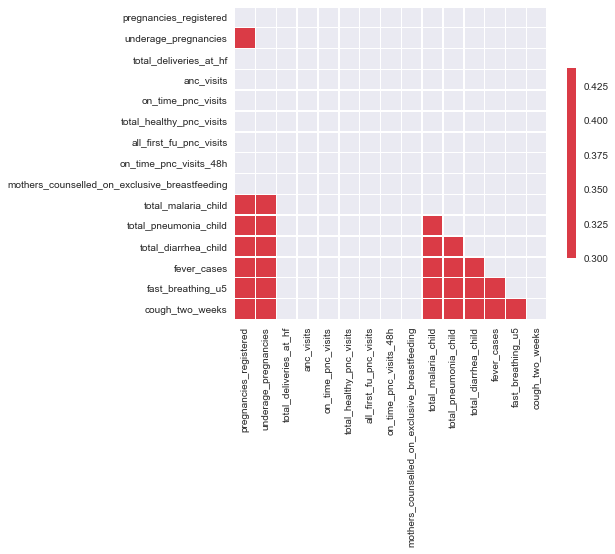

In [23]:

print("\n\nii.. Correlations - Amongst Cases or Diseases")
t,g = plotCorrz( corrz( EOY_ke_dt, ke_argz_pregoz+ke_argz_diseases+ke_argz_signs,) )
t
